

```
# This is formatted as code
```

#**CardioGoodFitness**

#About Dataset:

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.


The team identifies the following customer variables to study:

 - product purchased, TM195, TM498, or TM798;
 - gender;
 - age, in years;
 - education, in years;
 - relationship status, single or partnered;
 - annual household income ($);
 - average number of times the customer plans to use the treadmill each week;
 - average number of miles the customer expects to walk/run each week;
 - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

###Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

##Dataset Information :
###cardiogoodfitness.csv: The csv contains data related to customers who have purchased different model from Cardio Good Fitness :
-	Product - the model no. of the treadmill
-	Age - in no of years, of the customer
-	Gender - of the customer
-	Education - in no. of years, of the customer
-	Marital Status - of the customer
-	Usage - Avg. # times the customer wants to use the treadmill every week
-	Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
-	Income - of the customer
-	Miles- expected to run
###Objective
-	Come up with a customer profile (characteristics of a customer) of the different products
-	Based on the data we have to generate a set of insights and recommendations that will help the company in targetting new customers



### Use EDA to answer following:

- How many models does store have?
- Which is most sold Model?
- Are Male customers buying treadmill more than female customers?
- What is the Income ,Age , Education of people buying treadmill.?
- What is the self rated fitness of customers buying treadmill.?
- Are married customer buying Treadmill more than Single customers?
- Is there any relation between Income and model.?
- Is there any relation between Age and model ?
- Is there any relation between self rated fitness and model .?
- Is there any relation between education and model.?
- Does gender has any effect on model customer buy .?
- Does Martial status has any effect model customer buy.?
- Is there different age groups buying different models.?
- Relation between Age, Income and education and model bought ?

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Reading the csv file cardiogoodfitness.csv in variable


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/0.Latest_DS_Course/Statistics/Descriptive/8.EDA/data/CardioGoodFitness.csv")
dffitness=data.copy()

###Examine the data by looking at the first 5 rows of the data


In [ ]:
dffitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
dffitness.tail()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


###get the size of dataframe


In [ ]:
dffitness.shape

(180, 9)

In [ ]:
# Observation:There are 180 rows and 9 columns in the dataset

In [ ]:
#get the type of data in dataframe
dffitness.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [ ]:
# Observation:

# Product,Gender and Martial status are string datatype .
# While Age, Education,Usage,Fitness,Income,Miles are integer datatype.

In [ ]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


###Data Preprocessing

In [ ]:
#changing it to  object dtype to category  to save memory
dffitness.Product=dffitness["Product"].astype("category")
dffitness.Gender=dffitness["Gender"].astype("category")
dffitness.MaritalStatus=dffitness["MaritalStatus"].astype("category")

In [ ]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [ ]:
#What are the different column name?
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

###Check for missing values

In [ ]:

dffitness.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


###Check for duplicate values

In [ ]:

dffitness.duplicated().sum()

0

In [ ]:
# Observation: There are no missing or duplicate values in the dataset



###Examine Data¶


### Lets see what the all the unique values along every feature

In [ ]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

###How many products are there?

In [ ]:
dffitness.Product.nunique(), dffitness.Product.unique()

(3,
 ['TM195', 'TM498', 'TM798']
 Categories (3, object): ['TM195', 'TM498', 'TM798'])

###what is Martial status of customers?

In [ ]:
dffitness['MaritalStatus'].nunique(), dffitness['MaritalStatus'].unique()

(2,
 ['Single', 'Partnered']
 Categories (2, object): ['Partnered', 'Single'])

###Avg. # times the customer wants to use the treadmill every week

In [ ]:
dffitness['Usage'].nunique(), dffitness['Usage'].unique()

(6, array([3, 2, 4, 5, 6, 7]))

### what is self rated fitness of customers buying treadmill?


In [ ]:
dffitness['Fitness'].nunique(), dffitness['Fitness'].unique()

(5, array([4, 3, 2, 1, 5]))

# what is eductaion of customer buying treadmill?


In [ ]:
dffitness['Education'].nunique(), dffitness['Education'].unique()

(8, array([14, 15, 12, 13, 16, 18, 20, 21]))

##Observations so far:

 - There are 3 different treadmills products.['TM195', 'TM498', 'TM798']
 - There are both Partnered and single customers['Single', 'Partnered']
 - Age of customers ranges from 18 to 50
 - Education in years is from 12 -21 [14 15 12 13 16 18 20 21]
 - Usage is from 2 days to 7 days a week [3 2 4 5 6 7]
 - Fitness level of customers from 1 -5 [4 3 2 1 5]

In [ ]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
dffitness.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Observation:

# Age of customer using treadmill is between range 18 - 50 . Average age is 28.78 and median is 26.
# Maximum income of treadmill user is 100K , Average income approx. 54K ,while median is is approx. 51K.
# Expected Treadmill usage is atleast Once a week , maximum is 7 times a week and on Average 3 times a week
# Customer education is between 12 -21 years, with average and median of 16 years and maximum of 21 years
# Customer expects to runs on an average of 103.19 miles per week, median 94 miles per week.
# Average self rated fitness is 3.

###Which is most sold Model?

In [ ]:

dffitness['Product'].value_counts(normalize=True)

,proportion
Product,
TM195,0.444444
TM498,0.333333
TM798,0.222222


In [ ]:
dffitness.groupby('Product').size()

,0
Product,
TM195,80
TM498,60
TM798,40


### Observation: TM195 treadmill model is most sold model.

###Are Male customers buying treadmill more than female customers?


In [ ]:
dffitness.Gender.value_counts(normalize=True)

,proportion
Gender,
Male,0.577778
Female,0.422222


In [ ]:
(104/(104+76))*100

57.77777777777777

### Observation: There are 76 female and 104 males customers. More Male customers are buying treadmill compared to female customer

###Are married customer buying Treadmill more than Single customers?


In [ ]:
dffitness.MaritalStatus.value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


In [ ]:
107/(107+73)

0.5944444444444444

### Observation: There are 107 Partnered and 73 single customers. Customers who are Partnered are buying treadmill more compared to single customer.

In [ ]:
dffitness[dffitness['Product'] == 'TM195'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [ ]:
# Observation

# 80 customers bought TM195 model
# Average age of customer who purchases TM195 is 28.5 , Median is 26 . Data is right skewed.
# Average Education is 15 and median is 16.
# Expected usage is 3 day a week
# Expected Miles to run is on an Average 82.78 miles per week and median is 85.
# Self rated fitness is 3 that is average fitness level
# Average income and median is around $46K.

In [ ]:
dffitness[dffitness['Product'] == 'TM498'].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [ ]:
# **Observations

# There are 60 customers who purchased TM 498 Model
# Average age of customer who purchases TM498 is 28.9 , Median is 26 . Age is right skewed. Customer range is between 24-33.
# Average Education is 15 and median is 16.
# Expected usage is 3 day a week
# Expected Miles to run is on an Average 60 miles per week and median is 85.
# Average Income is 48973.
# Median Income is 49459

In [ ]:
dffitness[dffitness['Product'] == 'TM798'].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


In [ ]:
# Observations

# Average age of customer who purchases TM798 is 29 , Median is 27 .
# Average Education is 17 and median is 18.
# Expected usage is 4-5 day a week
# Expected Miles to run is on an Average 166 miles per week and median is 160.
# Average Income is 75K and median is 76K

###Let Visualize the Data and get more insights¶


##Univariate Analysis




In [ ]:
def dist_box(data):
    # Function plots a combined graph for univariate analysis of continuous variable
    # to check spread, central tendency, dispersion, and outliers
    Name = data.name.upper()
    fig, axes = plt.subplots(1, 2, figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')

    # Distribution plot with KDE
    sns.distplot(data, kde=True, color='blue', ax=axes[0])

    # Add lines for mean, median, and mode
    mean_line = axes[0].axvline(data.mean(), color='y', linestyle='--', linewidth=2)
    median_line = axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    mode_line = axes[0].axvline(data.mode()[0], color='g', linestyle='solid', linewidth=2)

    # Create a custom legend
    axes[0].legend([mean_line, median_line, mode_line], ['Mean', 'Median', 'Mode'])

    # Boxplot with means plotted separately
    sns.boxplot(x=data, showmeans=True, orient='h', color="blue", ax=axes[1])

    # Add lines for mean, median, and mode
    mean_line = axes[1].axvline(data.mean(), color='y', linestyle='--', linewidth=2)
    median_line = axes[1].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    mode_line = axes[1].axvline(data.mode()[0], color='g', linestyle='solid', linewidth=2)

    # Create a custom legend
    axes[1].legend([mean_line, median_line, mode_line], ['Mean', 'Median', 'Mode'])
    plt.show()

###Income column - Univariate

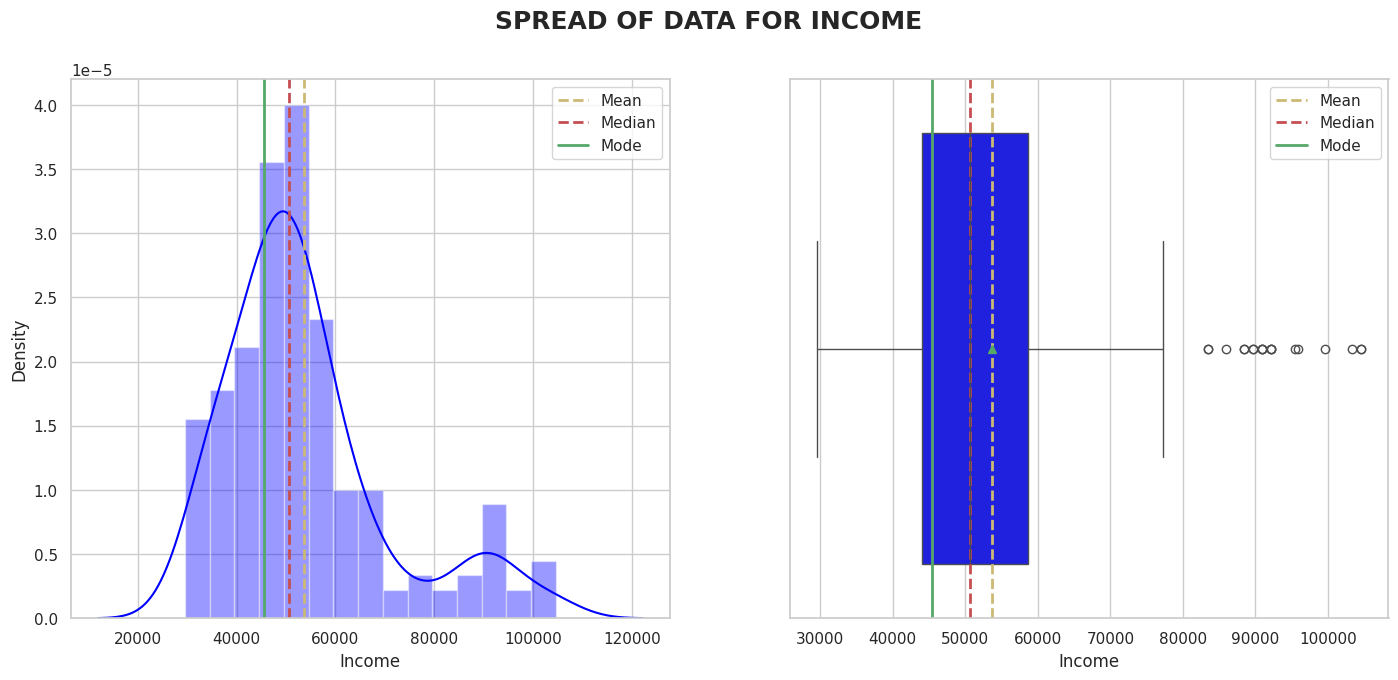

50596.5

In [ ]:
dist_box(dffitness.Income)
np.median(dffitness.Income)

In [ ]:
# Observations:

# Income is skewed towards right , Median is 50K , Mean is 55k and mode is $45K.
# Most of the customers are in lower pay range and earn less than 70K.
# Income has some outliers. Few customers earn beyond 80K.

###Age Column - Univariate

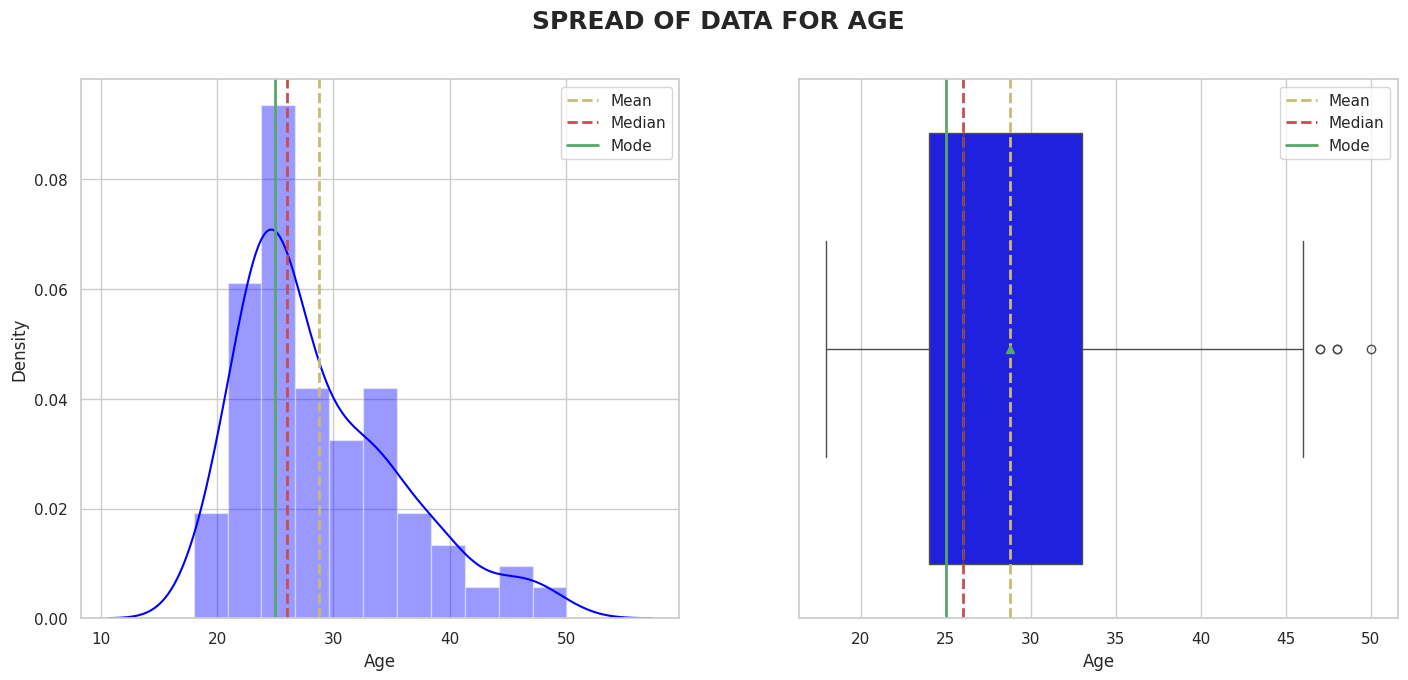

In [ ]:
dist_box(dffitness.Age)


In [ ]:
# Observations:

# Age is skewed towards right.
# Customers buying treadmill are younger and average age of customer is 28 , median is 26 and mode is 25
# Customers buying treadmill after age of 40 and before 20 are very less.

###Miles column - Univariate

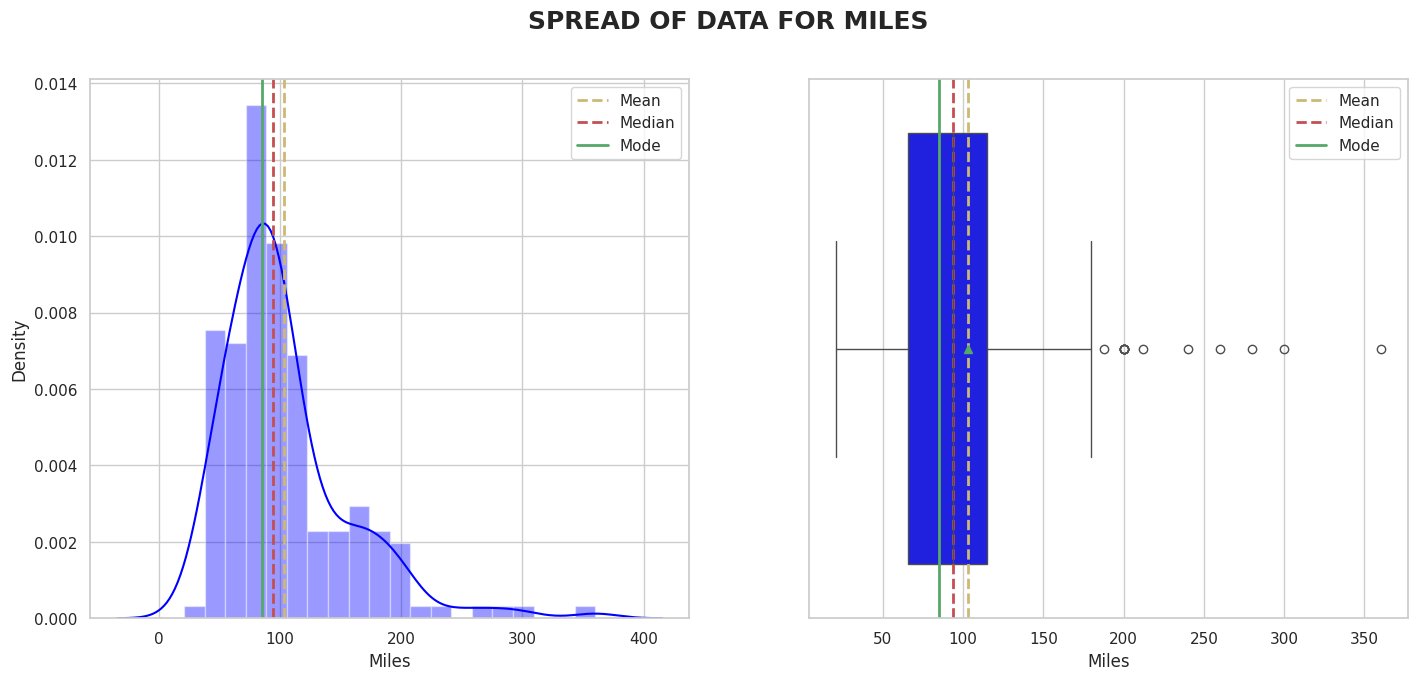

In [ ]:
dist_box(dffitness.Miles)


In [ ]:
# Observations:

# Miles is skewed towards right.
# Customers expect to run on an average 80 miles per week.
# There are some outliers, where customers are expecting to run more than 200 miles per weak.

###Fitness Column - Univariate

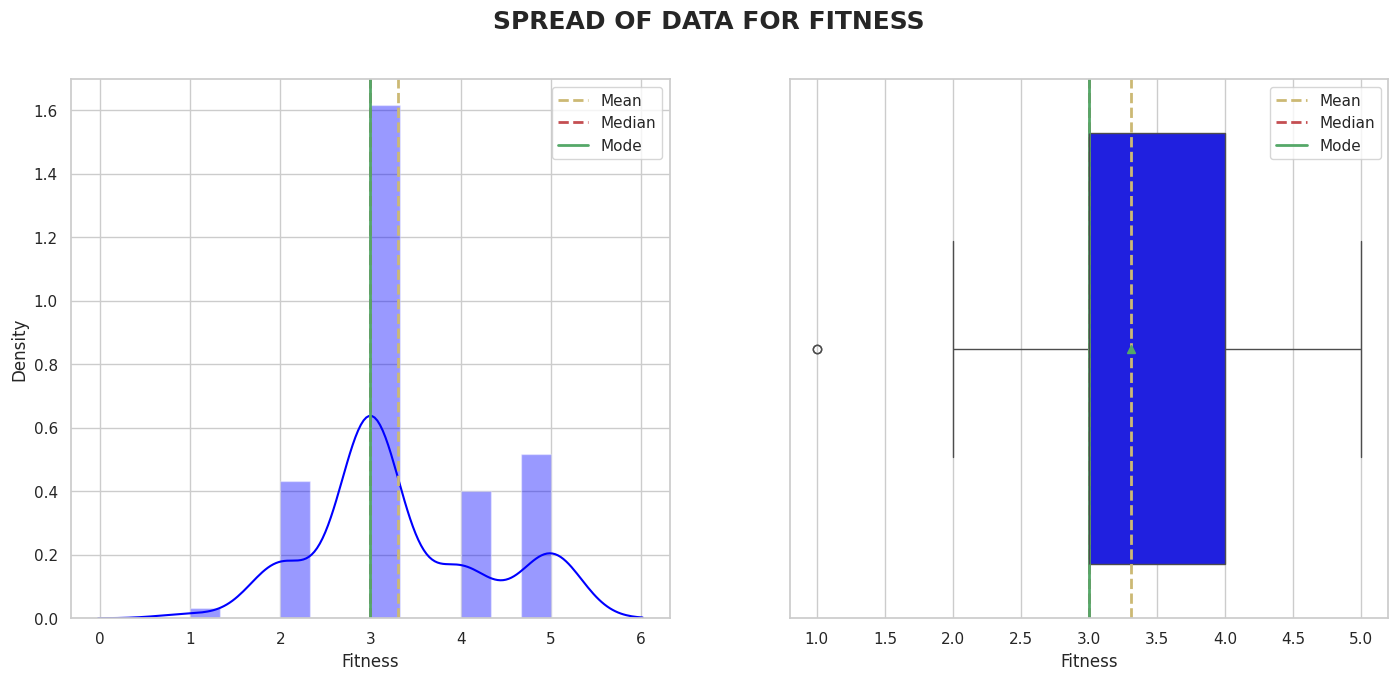

In [ ]:
dist_box(dffitness.Fitness)


In [ ]:
# Observations

# Most of the customers have self-rated their fitness as 3( average).

#Education Column - univariate

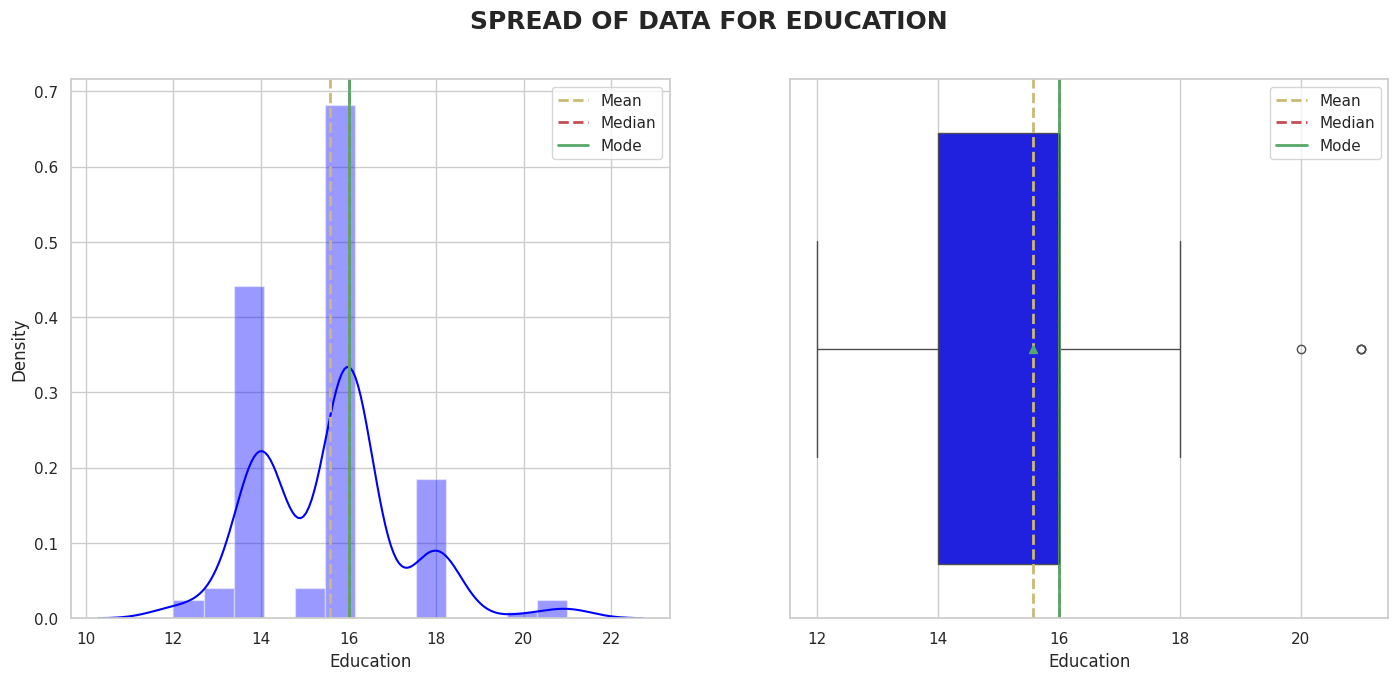

In [ ]:
dist_box(dffitness.Education)


In [ ]:
# Observations

# Most of the customers have 16 year of education (assuming them to be college graduates or bachelors).
# There are few outliers.

###Usage Column - univariate

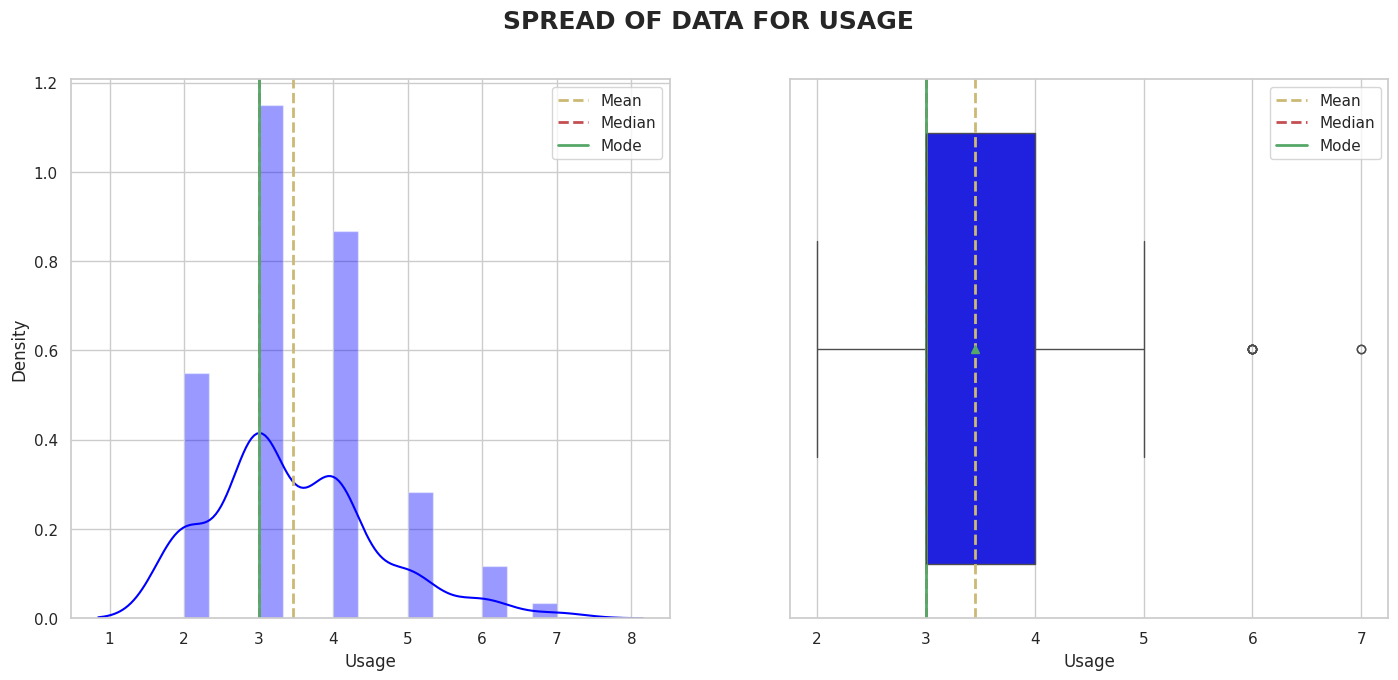

In [ ]:
dist_box(dffitness.Usage)


In [ ]:
# Observations

# Most of customers expect they will be using the treadmill 3-4 days per week.
# There are few outliers where customer are expecting to use treadmill for 6 or 7 times a week

###Univariate Analysis - categorical variables

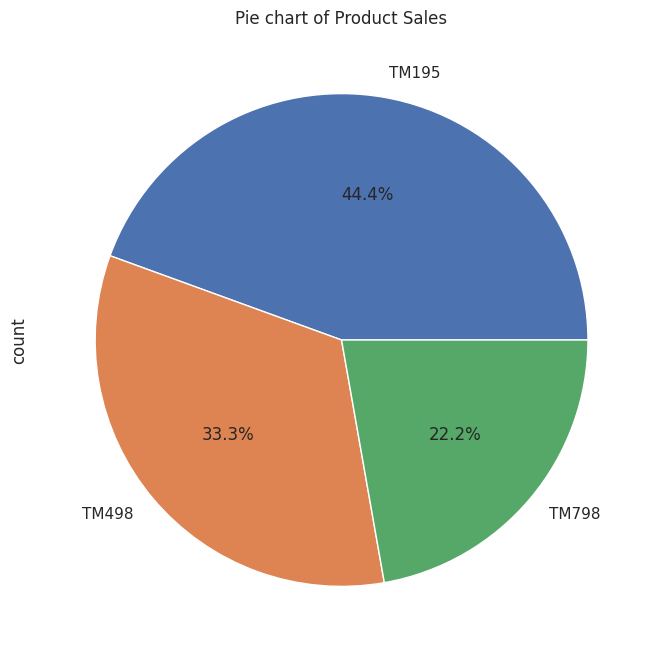

In [ ]:

plt.figure(figsize=(14,7))
dffitness['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

In [ ]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage'


# Function logic:

# total = len(feature): Calculates the total number of entries in the categorical feature.
# for p in plot.patches: Iterates over each bar in the plot. Each bar is a patch object.
# p.get_height(): Gets the height of the bar, which represents the count of a specific category.
# percentage = '{:.1f}%'.format(100 * p.get_height() / total): Calculates the percentage of the total count for each category and formats it to one decimal place.
# x and y: Calculate the position for placing the percentage text on the bar.
# x: Center the text horizontally on the bar.
# y: Place the text slightly above the top of the bar.
# plot.annotate(percentage, (x, y), size=12): Adds the percentage as an annotation on the plot.

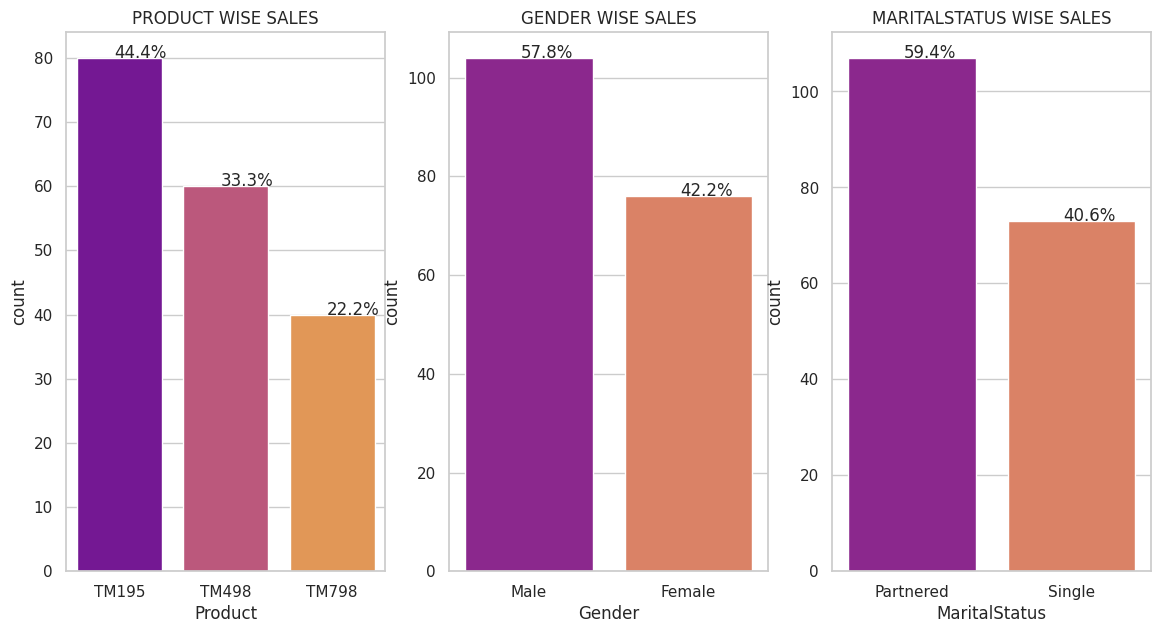

In [ ]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
list_col=['Product','Gender','MaritalStatus']
j=0
for i in range(len(list_col)):
    order = dffitness[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=dffitness , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() + ' WISE SALES')
    bar_perc(axes1[i],dffitness[list_col[i]])

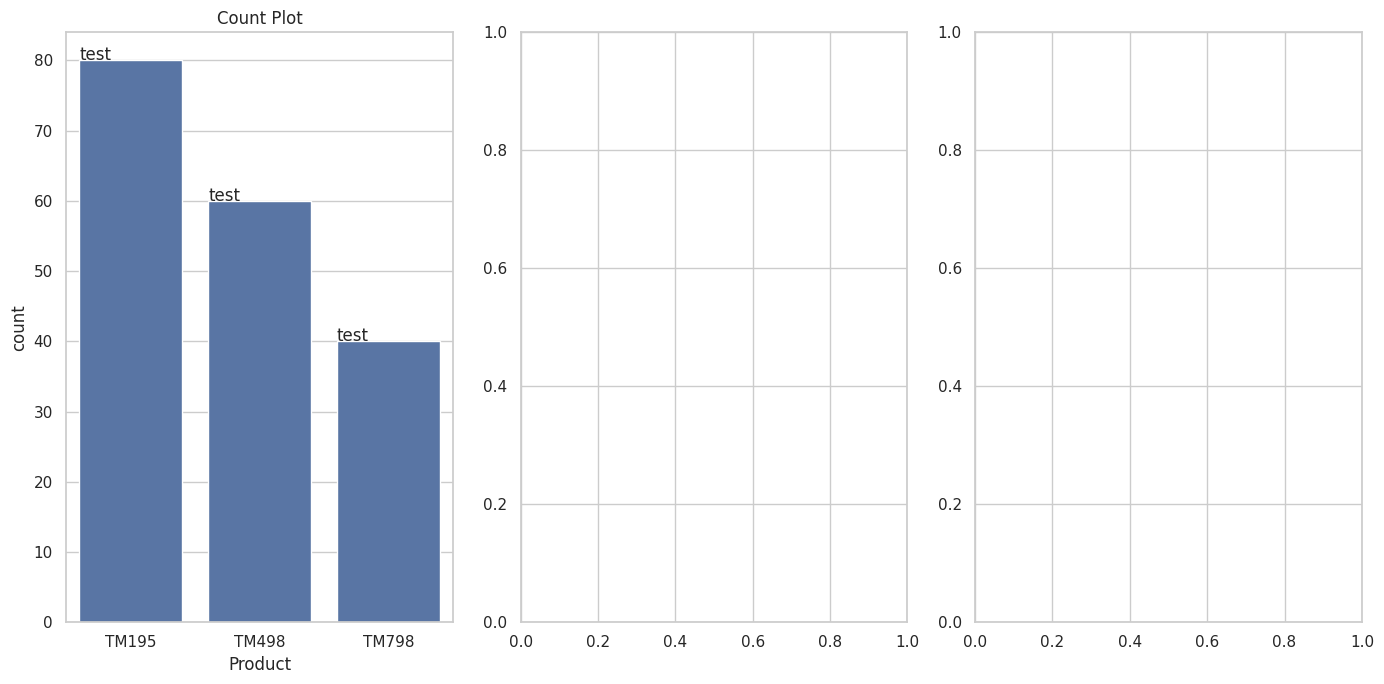

In [ ]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))

sns.countplot(data=dffitness, x='Product', ax=axes1[0])
axes1[0].set_title('Count Plot')



for bar in axes1[0].patches:
    axes1[0].annotate(
        text="test",
        xy=(bar.get_x(),bar.get_y()+bar.get_height()),  # Position at the top of the bar
          # xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),

    )
plt.tight_layout()
plt.show()


In [ ]:
dffitness.Product.value_counts(normalize=True)

,proportion
Product,
TM195,0.444444
TM498,0.333333
TM798,0.222222


In [ ]:
# Observation:
# 44.4% customers brought TM195. TM195 model is the most purchased model. TM498 was purchased more than TM798.
# 57.8% male brought Treadmill.There are more Male customers than Female customers.
# 59.4% of the customers who purchased treadmill are Married.

#Bi variate Analysis


###Is there a connection between the product being sold vs age of customer, what is the #Average age of customer buying each model

In [ ]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:

dffitness.groupby('Product')['Age'].mean()

,Age
Product,
TM195,28.55
TM498,28.90
TM798,29.10


In [ ]:
#Average Income of customer buying each model
dffitness.groupby('Product')['Income'].mean()

,Income
Product,
TM195,46418.025
TM498,48973.650
TM798,75441.575


In [ ]:
#Average miles of customer buying each model
dffitness.groupby('Product')['Miles'].mean()

,Miles
Product,
TM195,82.787500
TM498,87.933333
TM798,166.900000


Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


Text(0.5, 1.0, 'PRODUCT BY GENDER')

<Figure size 1000x1000 with 0 Axes>

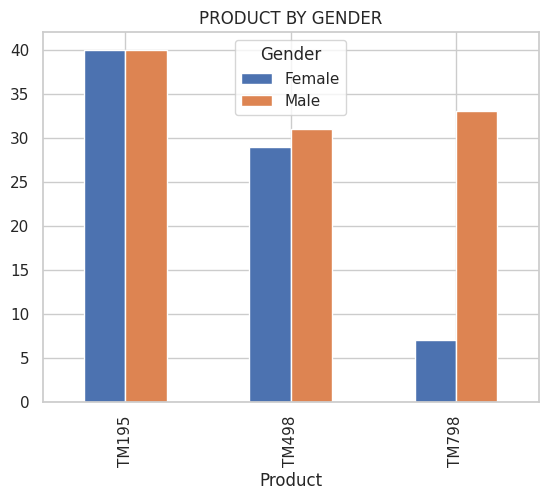

In [ ]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(dffitness['Product'],dffitness['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("PRODUCT BY GENDER")

In [ ]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

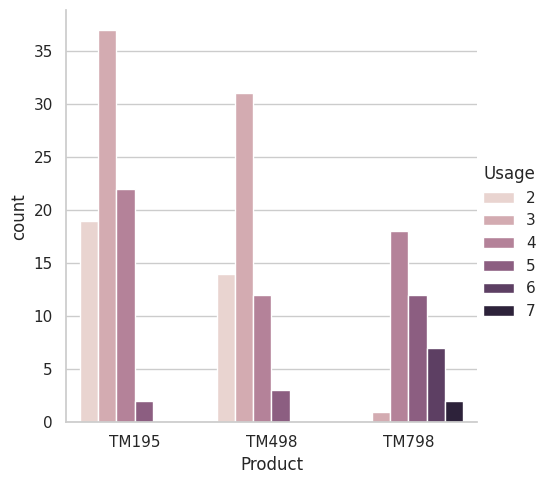

In [ ]:
sns.catplot(data=dffitness, x='Product',kind='count', hue='Usage')

In [ ]:
# Observation

# TM195 model was equally bought my Male and Female
# Compared to females, male bought TM498 model .
# TM798 model is popular in Males than in female.

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


Text(0.5, 1.0, 'PRODUCT BY MARTIAL STATUS')

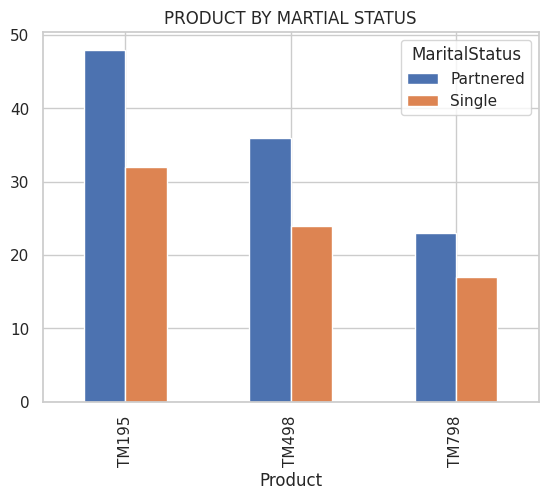

In [ ]:
prd_mar_status=pd.crosstab(dffitness['Product'],dffitness['MaritalStatus'] )
print(prd_mar_status)
prd_mar_status.plot(kind='bar')
plt.title("PRODUCT BY MARTIAL STATUS")

In [ ]:
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [1]:

# Exclude categorical columns
numerical_data = dffitness.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, corner=True)
plt.show()

NameError: name 'dffitness' is not defined

In [ ]:
corr_pairs = numerical_data.corr().unstack() # give pairs of correlation
print( corr_pairs[abs(corr_pairs)>0.5]) # Gives us correlated data

Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


Here are some observations from the heatmap of the correlation matrix:

1. **High Correlation between Fitness and Miles**:
   - The highest correlation value in the matrix is between `Fitness` and `Miles` (0.79). This suggests that as fitness level increases, the number of miles covered also increases, which makes sense intuitively.

2. **Moderate to High Correlations**:
   - `Usage` and `Miles` (0.76): There is a strong positive correlation, indicating that higher usage is associated with more miles covered.
   - `Income` and `Education` (0.63): Higher education levels are associated with higher income.
   - `Fitness` and `Usage` (0.67): Higher fitness levels are associated with higher usage.
   - `Income` and `Usage` (0.52): Higher income is moderately correlated with higher usage.

3. **Moderate Correlations**:
   - `Income` and `Fitness` (0.54): Higher income is moderately correlated with higher fitness levels.
   - `Income` and `Miles` (0.54): Higher income is moderately correlated with more miles covered.
   - `Education` and `Fitness` (0.41): Higher education levels are moderately correlated with higher fitness levels.
   - `Education` and `Usage` (0.40): Higher education levels are moderately correlated with higher usage.

4. **Low to Negligible Correlations**:
   - `Age` has a moderate positive correlation with `Income` (0.51), indicating that older individuals may have higher income.
   - Other correlations involving `Age` are generally low (e.g., `Age` and `Education` (0.28), `Age` and `Usage` (0.015), `Age` and `Fitness` (0.061), `Age` and `Miles` (0.037)).

Overall, the heatmap shows that variables related to fitness, usage, and miles tend to be more strongly correlated with each other. Education and income also show a notable correlation. Age, on the other hand, shows weaker correlations with most other variables.

<Figure size 1500x700 with 0 Axes>

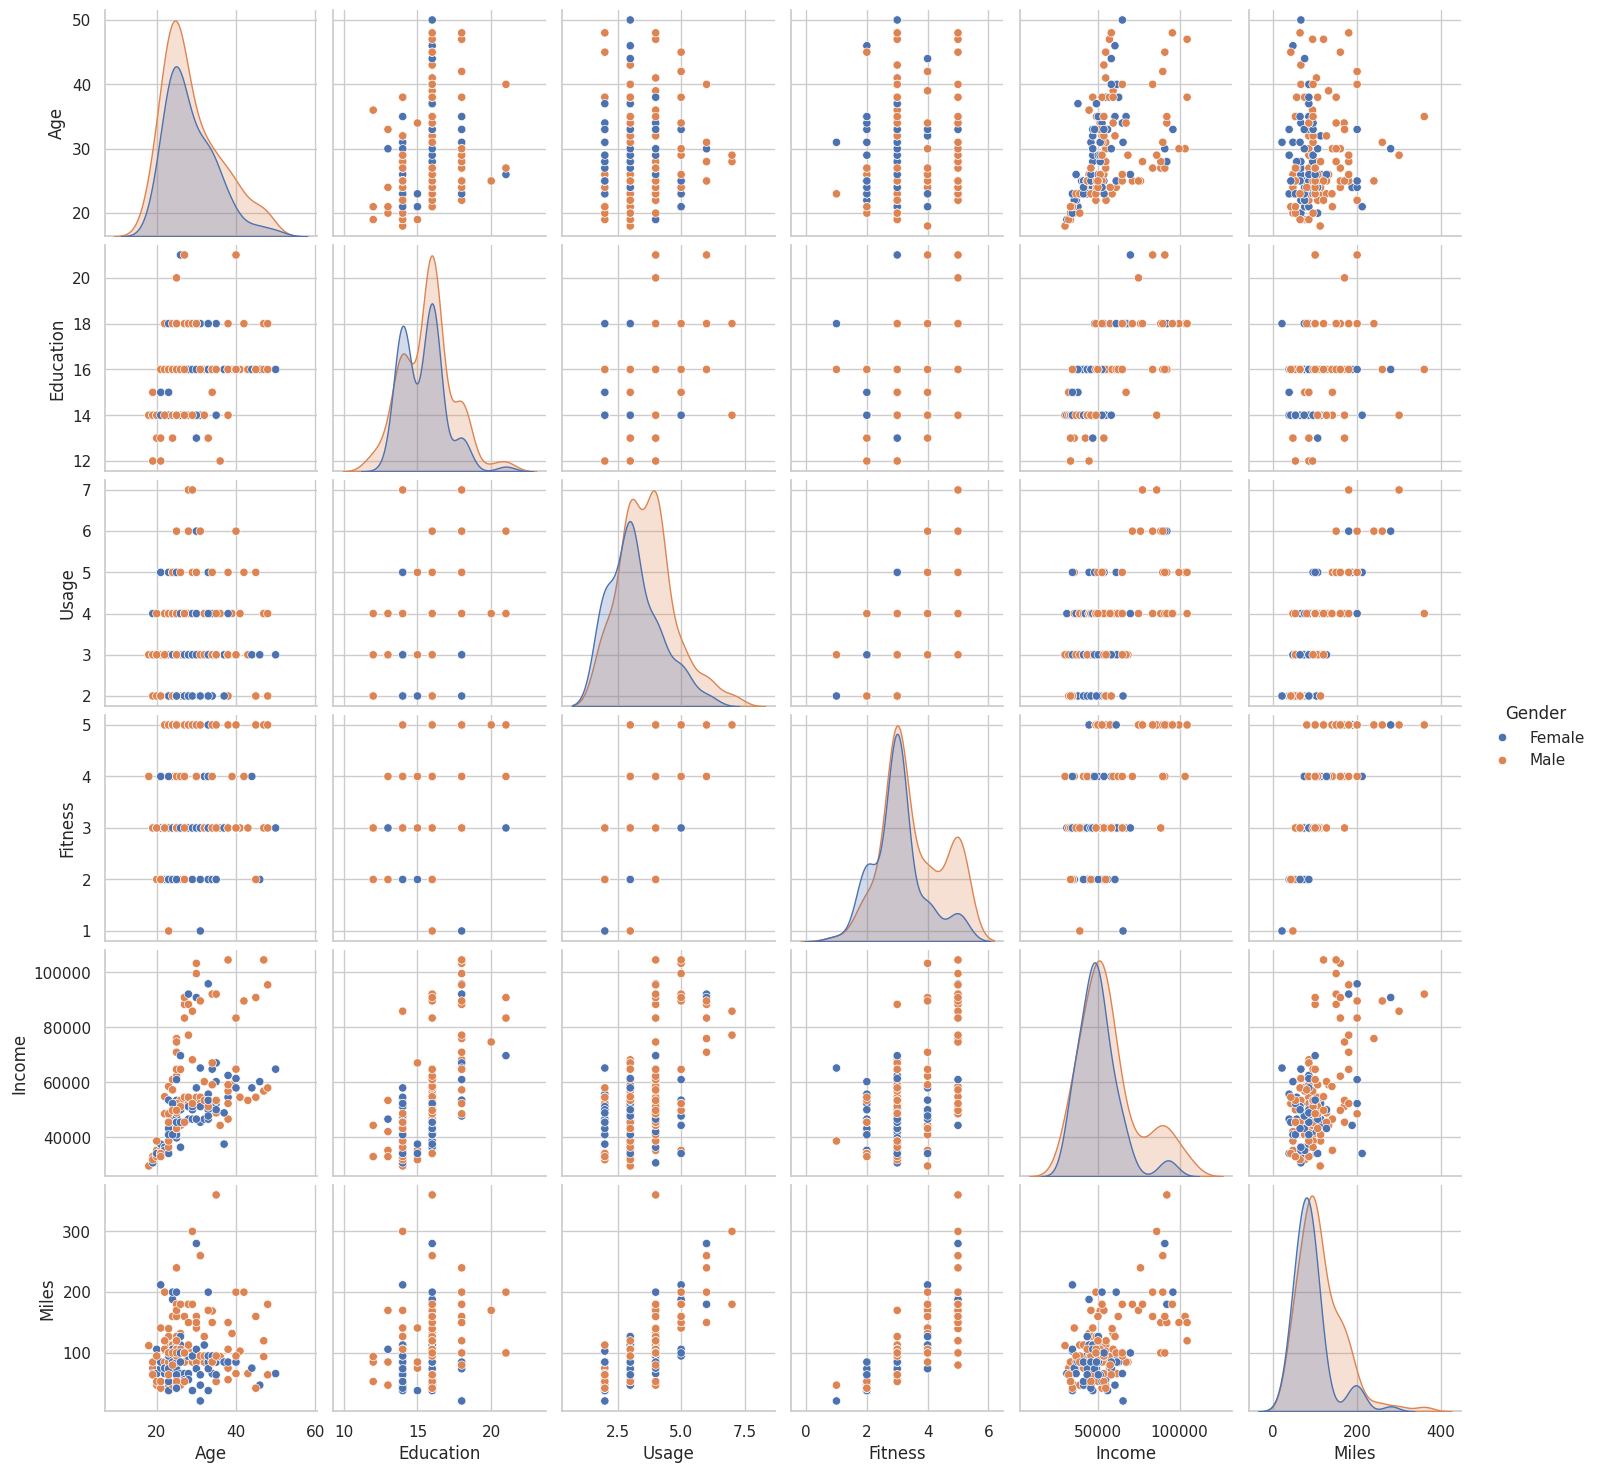

In [ ]:
plt.figure(figsize=(15,7))
sns.pairplot(data=dffitness, hue='Gender')

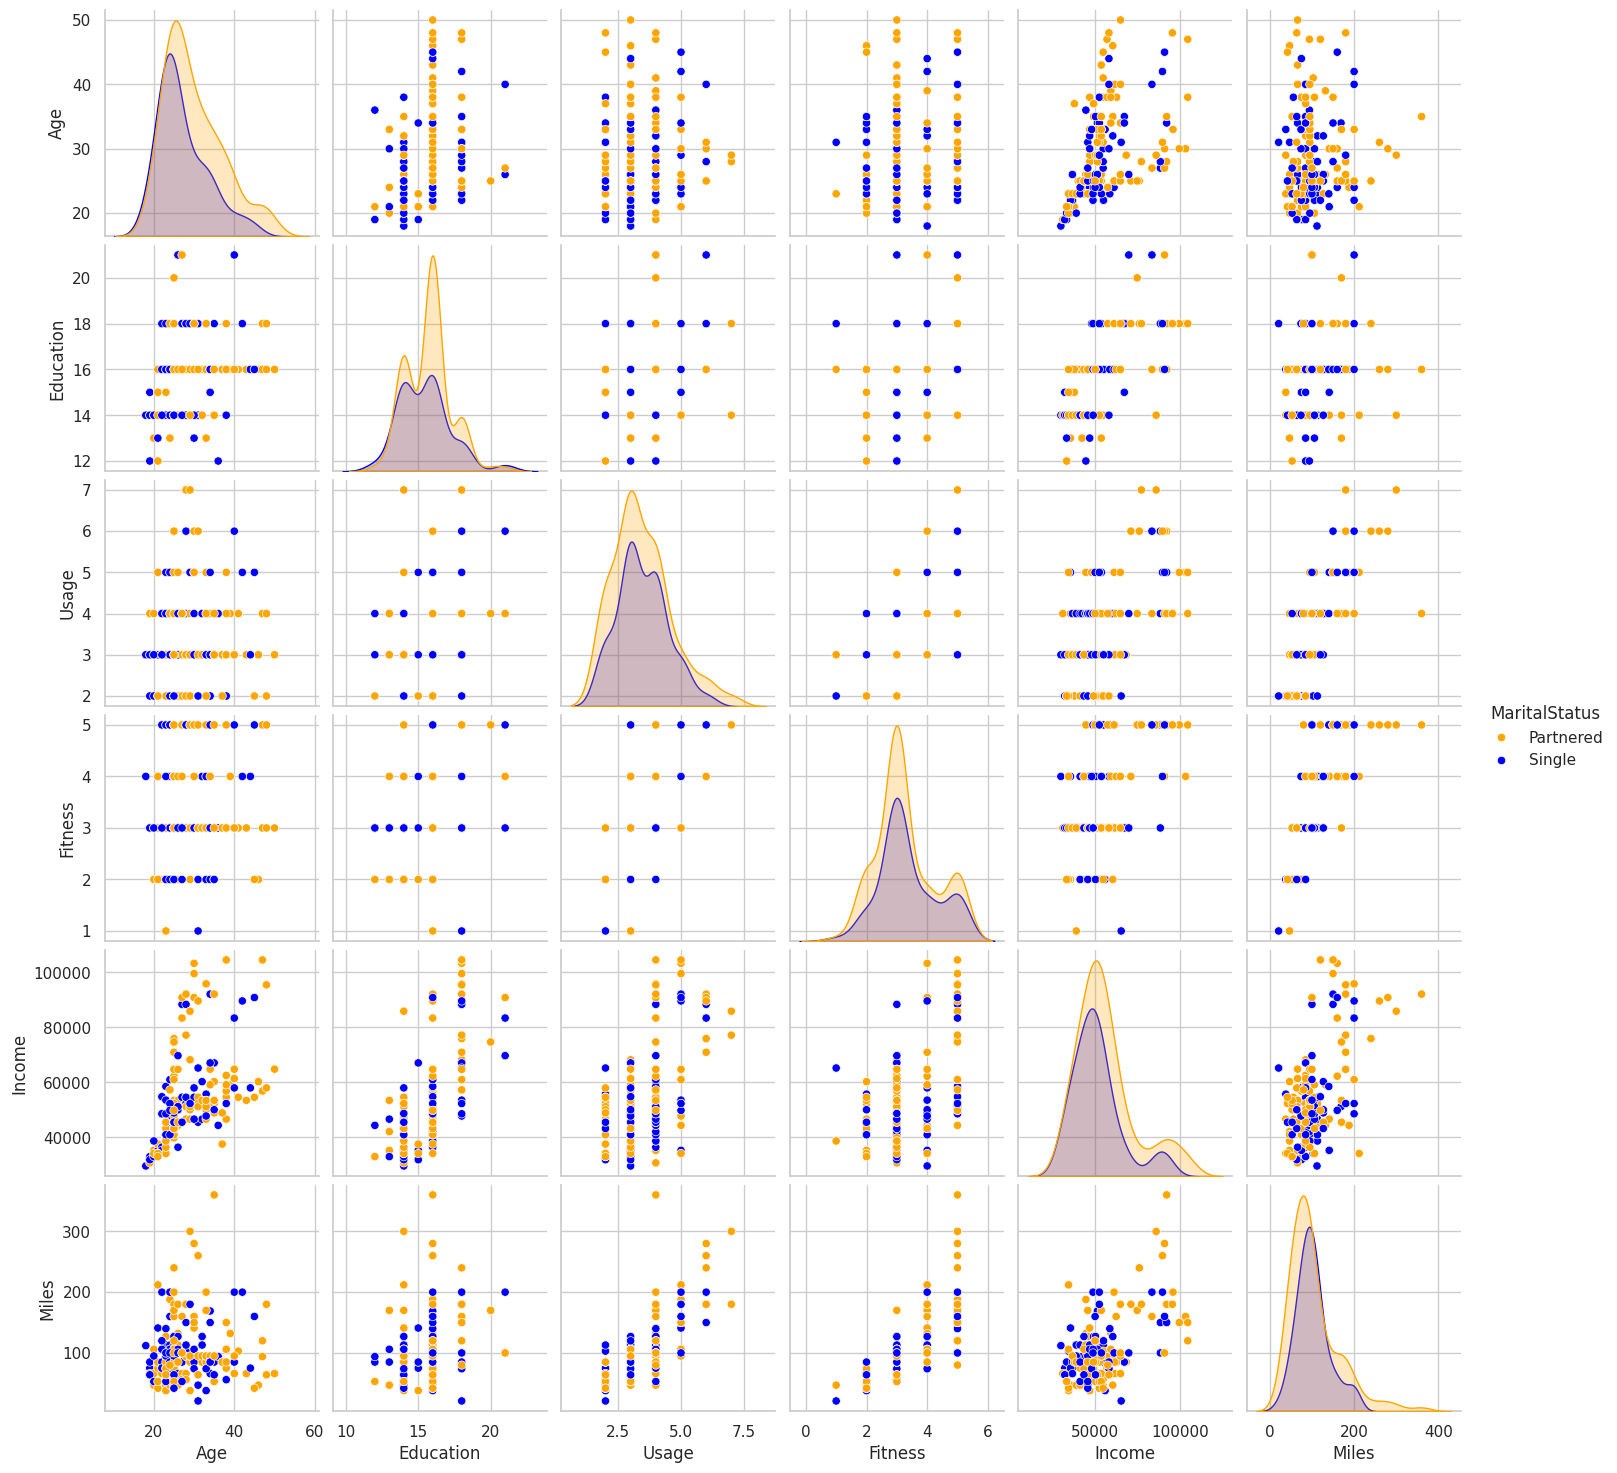

In [ ]:
# Define a custom palette
palette = {'Single': 'blue', 'Partnered': 'orange'}

# Create a pair plot with hue 'MaritalStatus' and a custom palette
pairplot = sns.pairplot(data=dffitness, hue='MaritalStatus', palette=palette)

# Show the plot
plt.show()

Several observations can be made regarding the relationships between the variables such as **Age**, **Education**, **Usage**, **Fitness**, **Income**, and **Miles**, separated by the two categories of **MaritalStatus** (Single and Partnered).

Here are some key insights:

1. **Age and Income**:
   - There appears to be a positive correlation between age and income, with older individuals generally earning more. This is reflected in both marital statuses.
   - Partnered individuals tend to have slightly higher incomes compared to single individuals, especially in the middle age range (around 30-40).

2. **Usage and Fitness**:
   - There is a positive relationship between **Usage** (possibly gym usage) and **Fitness** levels. Individuals who use the gym more frequently tend to have higher fitness levels.
   - This trend is consistent for both marital statuses.

3. **Miles and Usage/Fitness**:
   - Individuals who use the gym more frequently also tend to run more miles, which makes sense since higher gym usage likely corresponds with more time spent running or exercising.
   - Similarly, there is a positive relationship between fitness levels and miles run.

4. **Education and Income**:
   - Higher education levels are generally associated with higher incomes. This trend is observable in both single and partnered groups.
   - There are distinct clusters for education, as there may be common education levels such as 12, 16, and 18 years.

5. **Age and Miles**:
   - Younger individuals, especially those around 20-30 years old, tend to run more miles compared to older individuals.
   - Single individuals in this age group appear to run more miles than partnered ones.

6. **Income and Fitness**:
   - Higher-income individuals show a range of fitness levels, though there is no very strong direct correlation between income and fitness.
   - Some high-income individuals have lower fitness levels, and vice versa, suggesting income alone doesn’t determine fitness.

7. **Education and Fitness**:
   - There is no strong relationship between education levels and fitness. People with varying education levels show a similar range of fitness scores.

8. **Distribution of Variables**:
   - Age has a skewed distribution toward younger individuals (20-40 years).
   - Fitness is centered around moderate levels (2-4) for most individuals, but higher fitness levels are achieved by those with more usage.
   - Income distribution shows a wider range for partnered individuals, with some outliers in both marital statuses.
   - Miles run has a highly skewed distribution, with most individuals running fewer than 200 miles.

Overall, the pair plot indicates that **usage**, **fitness**, and **miles** are interrelated, while **age** and **income** show some positive correlation. There are distinctions between the behaviors of single and partnered individuals, with partnered individuals generally earning more but being less active in terms of miles run.

In [ ]:
# Observation:-

# we get the same observation as from the correlation plot

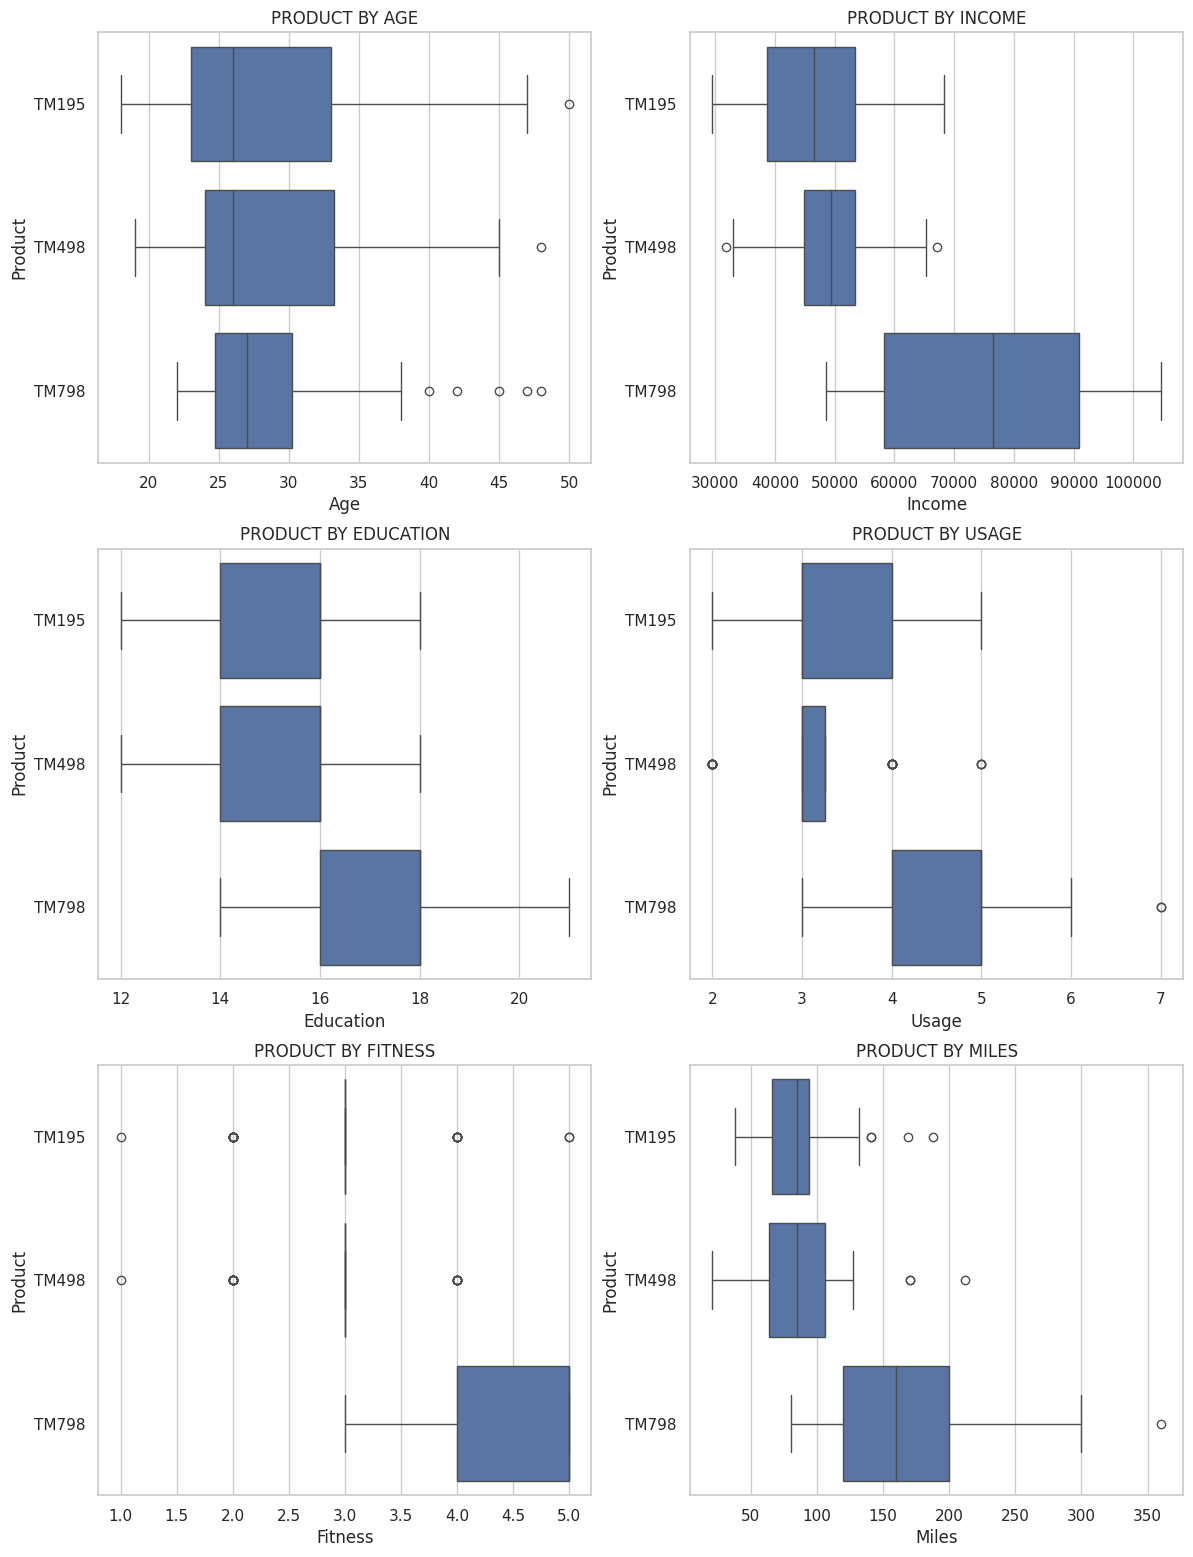

In [ ]:
#Bi Varaite Analysis for
#1.Product & Age
#2.Product & Income
#3.Product & Education
#4.Product & Usage
#5.Product & Fitness
#6.Product & Miles
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(x=dffitness[list1_col[i]], y=dffitness['Product'], ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper())

    # sns.boxplot(dffitness[list1_col[i]],dffitness['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )


# Grid Positioning:

# row = i // 2: Determines the row of the subplot grid based on the index i.
# For the first two plots (i=0,1), this will be row 0, for the next two (i=2,3) it will be row 1, and for the last two (i=4,5) it will be row 2.
# col = i % 2: Determines the column of the subplot grid.
# For even values of i (0, 2, 4), it will be the first column (col=0), and for odd values (1, 3, 5), it will be the second column (col=1).

In [ ]:
# Observations:-

# There are many outliers for TM798 ,customers are more than age of 40 .
# Age of customers buying TM195 and TM498 is between 20-35, where as customers buying TM798 are primarily in 25-30
# Customers with higher income and more education have purchased TM798 model.
# Customers with lower income purchase TM195 and TM498 model may be because of cost of the Treadmill
# Customer with TM 195 expect to use treadmill 3-4 times a week and have average self rated fitness as 3 and some unfits.
# Customers who bought TM498 model expecting to use Treadmill less frequently but to run more miles a week.
# Customer buying TM798 plan to use it more frequently , run more miles and have high self rated fitness .They seem to be more health conscious or professionals.
# TM 798 model was purchased more by males customer than female customers .
# More partnered customer tend to buy TM798 than Single customers

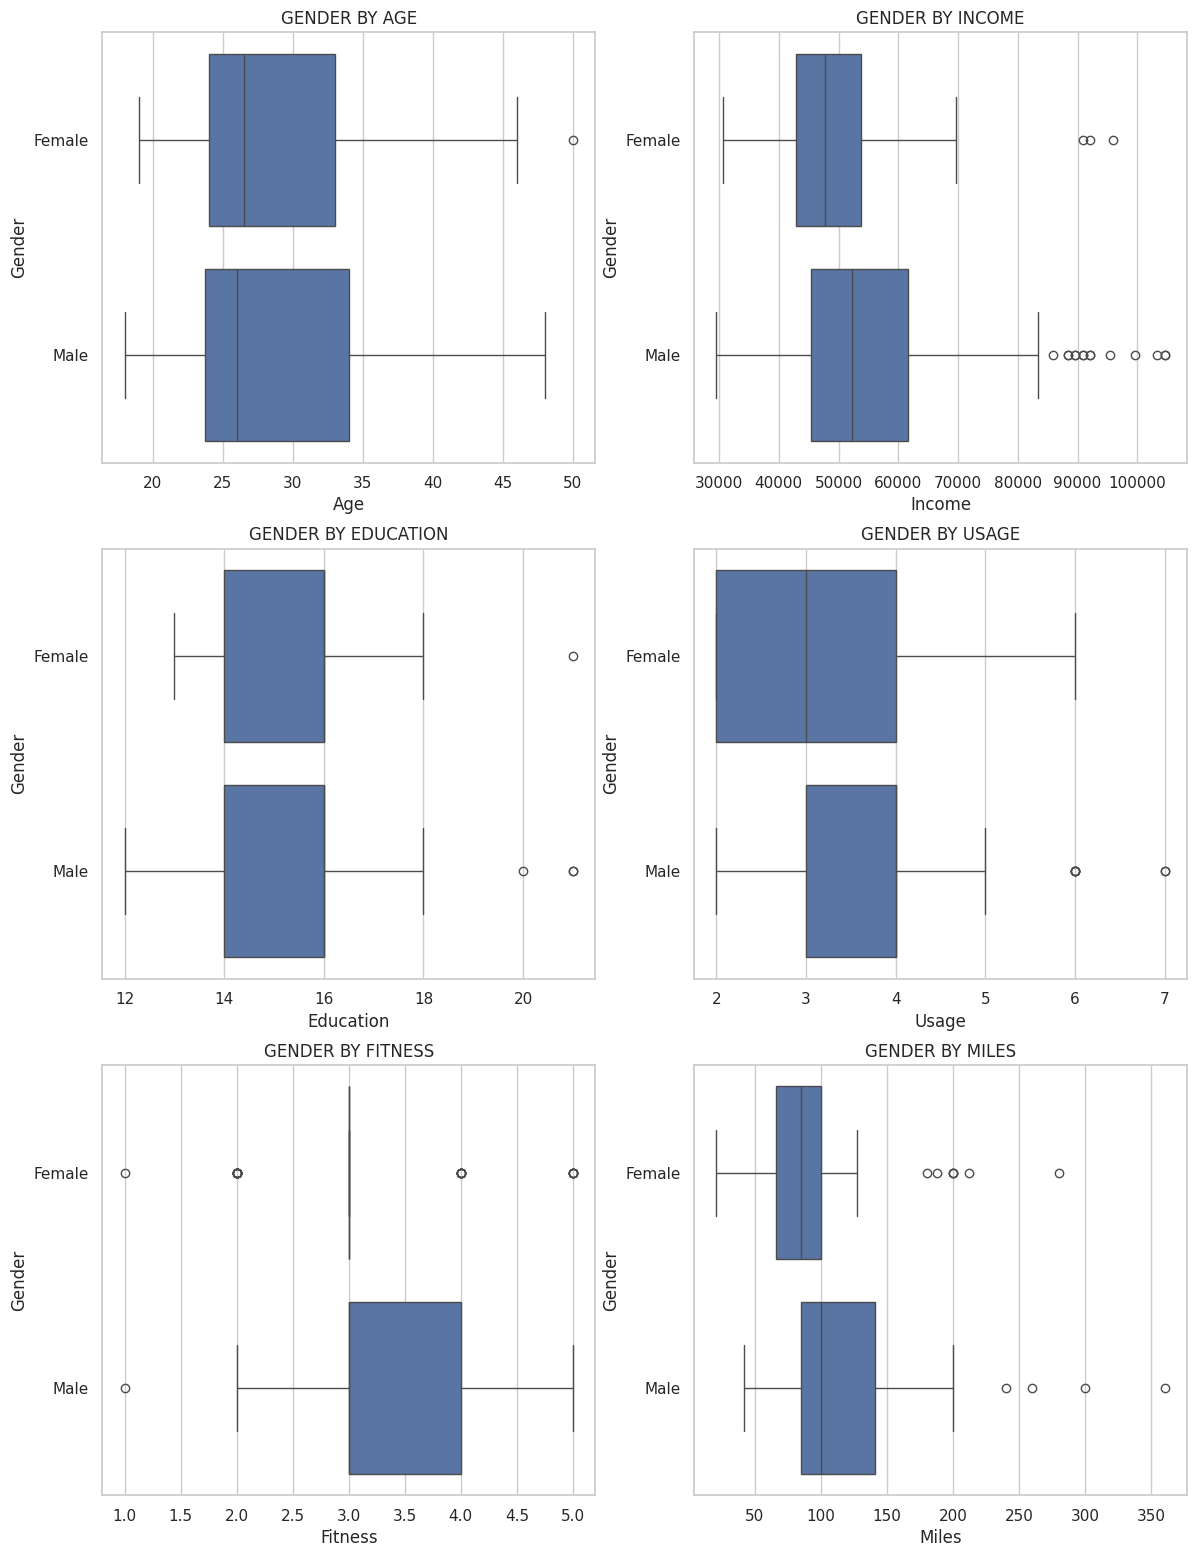

In [ ]:
#Bi Varaite Analysis for
#1.Gender & Age
#2.Gender & Income
#3.Gender & Education
#4.Gender & Usage
#5.Gender & Fitness
#6.Gender & Miles

fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
# to plot graph side by side.
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(x=dffitness[list1_col[i]], y=dffitness['Gender'], ax=ax).set(title='GENDER BY ' + list1_col[i].upper())
    # sns.boxplot(x=dffitness[list1_col[i]], y=dffitness['Product'], ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper())


# Grid Positioning:

# row = i // 2: Determines the row of the subplot grid based on the index i.
# For the first two plots (i=0,1), this will be row 0, for the next two (i=2,3) it will be row 1, and for the last two (i=4,5) it will be row 2.
# col = i % 2: Determines the column of the subplot grid.
# For even values of i (0, 2, 4), it will be the first column (col=0), and for odd values (1, 3, 5), it will be the second column (col=1).

In [ ]:
# Observations:-

# Male customers earn more than Female customers.
# Males Customer have higher self rated fitness than female.
# Expected Usage and miles covered on tread mill is less in Female customers than male customers.
# Female in age range 23-33 purchased the treadmill.
# Education of Male and Female customers is same.

<Figure size 700x700 with 0 Axes>

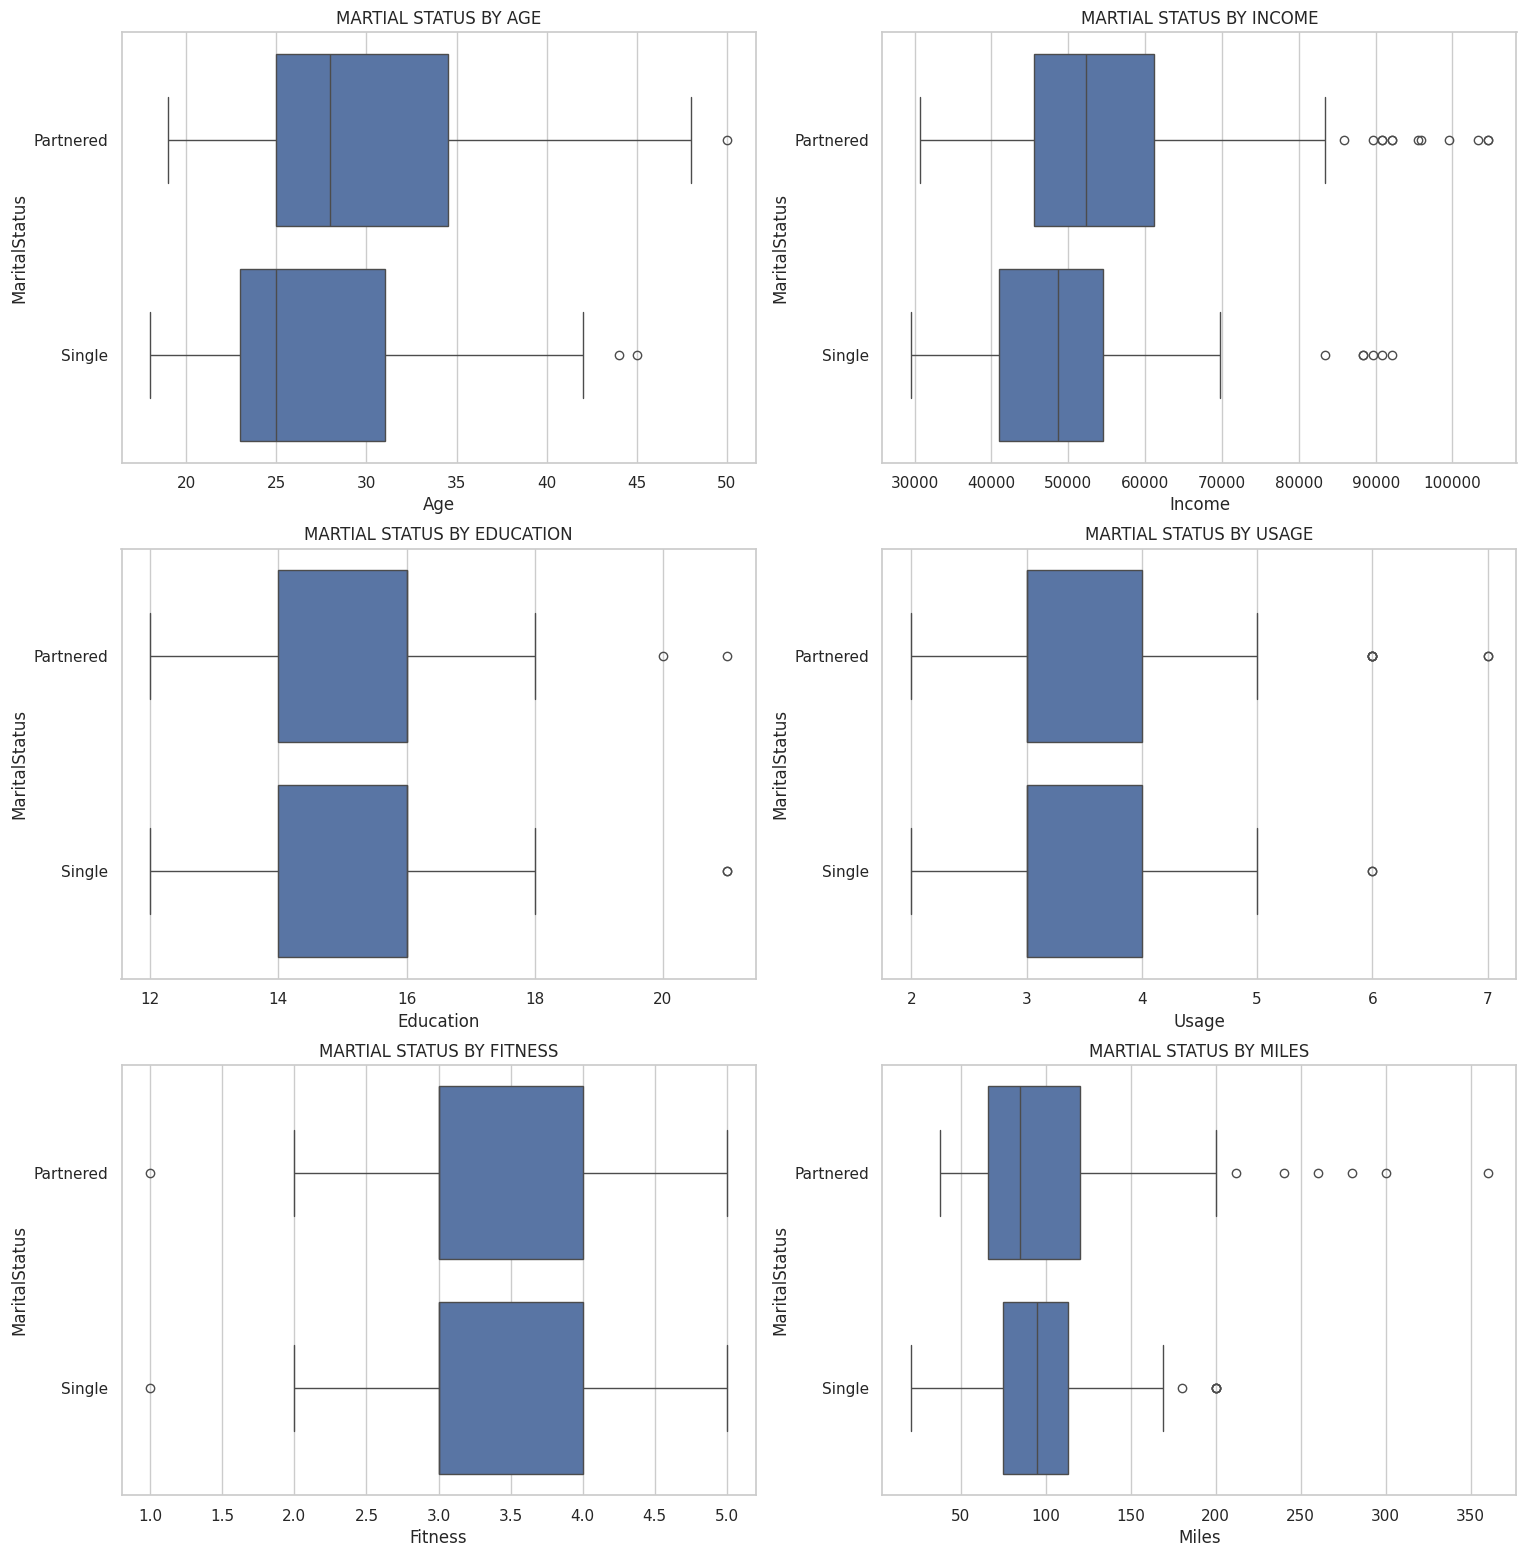

In [ ]:
#Bi Varaite Analysis for
#1.Martial Status & Age
#2.Martial Status & Income
#3.Martial Status & Education
#4.Martial Status & Usage
#5.Martial Status & Fitness
#6.Martial Status & Miles
plt.figure(figsize=(7,7))
fig1, axes1 =plt.subplots(3,2,figsize=(18, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(x=dffitness[list1_col[i]],y=dffitness['MaritalStatus'],ax=ax).set(title='MARTIAL STATUS BY ' + list1_col[i].upper())


# Grid Positioning:

# row = i // 2: Determines the row of the subplot grid based on the index i.
# For the first two plots (i=0,1), this will be row 0, for the next two (i=2,3) it will be row 1, and for the last two (i=4,5) it will be row 2.
# col = i % 2: Determines the column of the subplot grid.
# For even values of i (0, 2, 4), it will be the first column (col=0), and for odd values (1, 3, 5), it will be the second column (col=1).

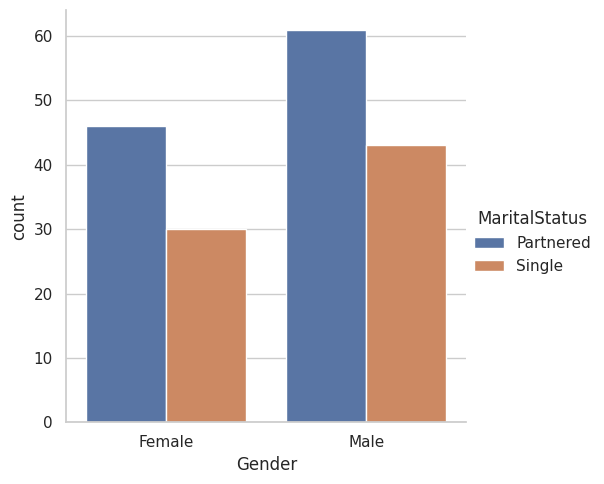

In [ ]:
# plt.figure(figsize=(7,7))
# sns.countplot(dffitness['Gender'],col=dffitness['MaritalStatus']).set(title='MARTIAL STATUS BY GENDER')
sns.catplot(data = dffitness, x='Gender', hue='MaritalStatus' , kind='count')

In [ ]:
# Observations

# Partnered customer expects to run more miles compared to single
# Income of Partnered customer is more than income of single customer.
# Age of Partnered customer is more than Age of single customer
# There are more single males buying Treadmill than single Females
# Self rated Fitness of both Partnered and Single customer are same.
# Education of both Partnered and Single customer is same

[Text(0.5, 1.0, 'EDUCATION  BY INCOME ')]

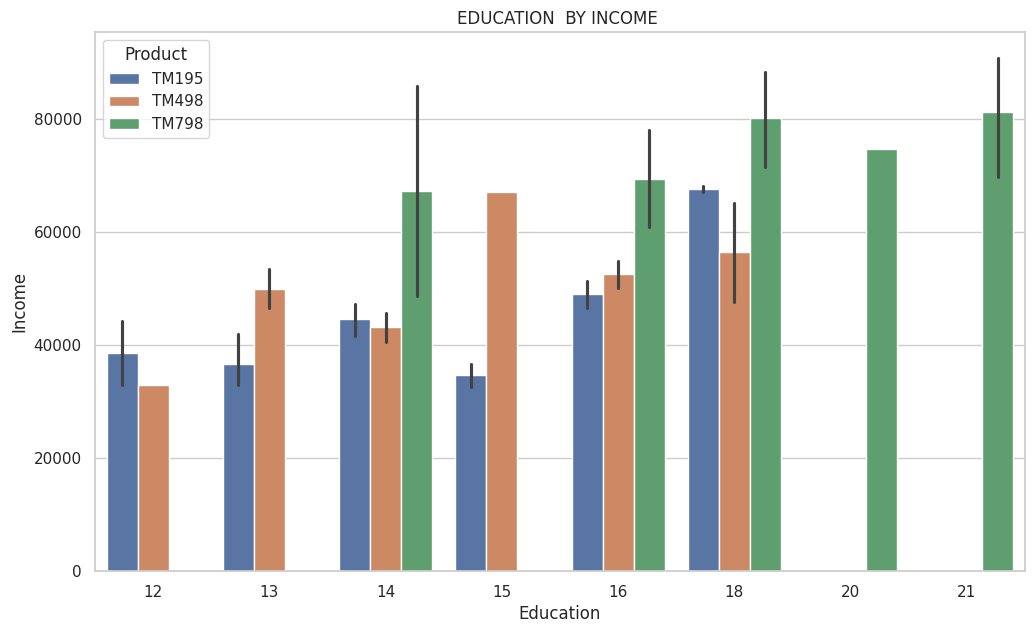

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=dffitness["Education"],y=dffitness["Income"],hue=dffitness['Product']).set(title='EDUCATION  BY INCOME ')


---

### **Customer Profiles for CardiogoodFitness Treadmills**  

#### **TM195 - The Most Popular Choice**  
- **Market Share:** 44.4% of customers chose TM195, making it the best-selling model.  
- **Income Profile:** The average customer earns **$46,000**, with most buyers earning under **$60,000** (average **$55,000**).  
- **Demographics:** Equal distribution of **male and female** buyers.  
- **Age & Education:**  
  - Average age: **28.5 years** (Median: **26 years**)  
  - Education: **15 years on average** (Median: **16 years**), likely indicating a **bachelor’s degree**.  
- **Fitness Habits:**  
  - Customers rate their own fitness as **average**.  
  - Expected treadmill usage: **3–4 times per week**.  

#### **TM498 - A Strong Performer**  
- **Sales Rank:** More popular than TM798 but behind TM195.  
- **Income Profile:** Customers have an **average income of $48,973**.  
- **Affordability Factor:** TM195 and TM498 appeal to customers with **lower income**, likely due to pricing.  
- **Age & Education:**  
  - Average age: **28.9 years** (Median: **26 years**), with most buyers between **24–33 years old**.  
  - Education: **16 years**, indicating a **bachelor’s degree**.  

#### **TM798 - The Premium Model**  
- **Age & Outliers:**  
  - Average customer age: **29 years** (Median: **27 years**).  
  - Some **outliers above 40** suggest an opportunity to explore an untapped segment.  
- **Education Level:**  
  - Average **17 years** of education (Median: **18 years**), indicating **some advanced studies**.  
- **Usage Expectations:**  
  - Customers plan to use it **4–5 times per week**.  
  - Expected weekly mileage: **166 miles on average** (Median: **160 miles**).  
- **Income Profile:**  
  - Average income: **$75,000** (Median: **$76,000**).  
- **Market Share:**  
  - Contributes **only 22%** of total sales.  

---

### **Key Recommendations**  


 **Budget-Friendly Marketing for TM195 & TM498**  
- These models attract buyers earning **under $60,000**, likely due to affordability.  
- Position them as **cost-effective fitness solutions** for the general audience.  

 **Premium Branding for TM798**  
- Given its **higher price point**, TM798 should be marketed as a **luxury treadmill** for **professionals and athletes**.  
- Develop a **high-end brand image** to justify its premium price.  

 **Boost TM798 Sales with Athlete Endorsements**  
- If TM798 offers **higher profit margins**, consider athlete partnerships for credibility.  
- Highlight advanced features to encourage **existing treadmill users to upgrade**.  

 **Expanding the Female Customer Base**  
- Run targeted campaigns on **Women’s Day, Mother’s Day**, and **fitness awareness programs** to attract more female buyers.  

 **Exploring the 35+ Age Group**  
- The majority of customers are aged **18–35**, leaving potential gaps in the **35+ demographic**.  
- Further research is needed to assess interest and **customize marketing strategies** for this segment.  
